In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

df_internet = pd.json_normalize(df['internet'])

df_total = pd.json_normalize(df['account'])

cuentas_diarias = pd.DataFrame({'Charges.Monthly': df_total['Charges.Monthly']})
cuentas_diarias.reset_index(drop=True, inplace=True)

df.head()



customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [ ]:
df['Churn'].replace({'Yes': 1, 'No': 0, '':0}, inplace=True)

df['Churn'].describe()

/tmp/ipython-input-1364714258.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace({'Yes': 1, 'No': 0, '':0}, inplace=True)
/tmp/ipython-input-1364714258.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'].replace({'Yes': 1, 'No': 0, '':0}, inplace=True)


count    7267.000000
mean        0.257190
std         0.437115
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [ ]:
si = 0
no = 0

for i,n in enumerate(df['Churn']):
  if n == 0:
    no += 1
  else:
    si += 1

total = si + no
print("Dejaron la empresa: " + str(si) + ", No dejaron la empresa: " + str(no) + ', Total: ' + str(total) )

Dejaron la empresa: 1869, No dejaron la empresa: 5398, Total: 7267


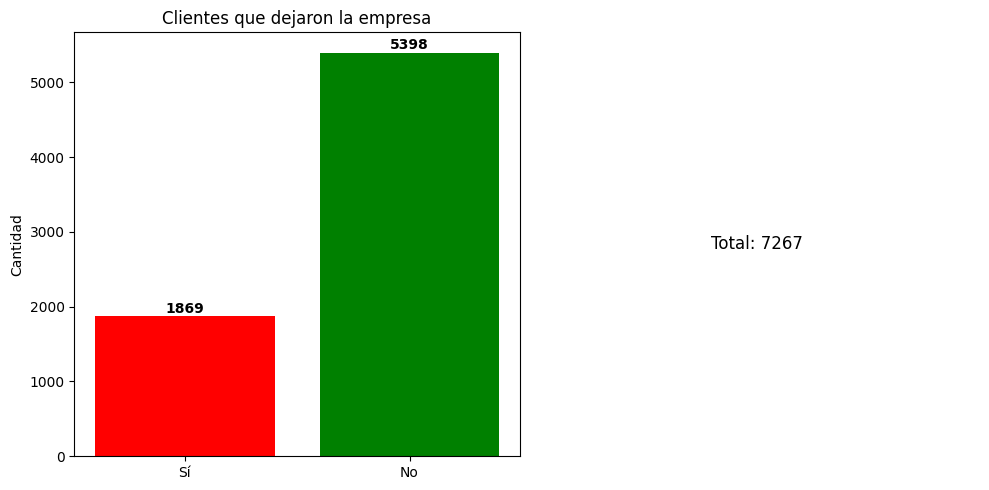

In [ ]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1,2, figsize=(10,5))

# Datos para el gr√°fico
labels = ['S√≠', 'No']
values = [si, no]
colors = ['red', 'green']

# Gr√°fico de barras
bars = axis[0].bar(labels, values, color=colors)
axis[0].set_title('Clientes que dejaron la empresa')
axis[0].set_ylabel('Cantidad')

# Agregar texto encima de cada barra
for bar in bars:
    height = bar.get_height()
    axis[0].text(bar.get_x() + bar.get_width() / 2, height + 1, str(height),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Puedes dejar el segundo subplot vac√≠o o agregar otro gr√°fico
axis[1].text(0.5, 0.5, f'Total: {total}', ha='center', va='center', fontsize=12)
axis[1].axis('off')  # Oculta ejes del segundo subplot

plt.tight_layout()
plt.show()

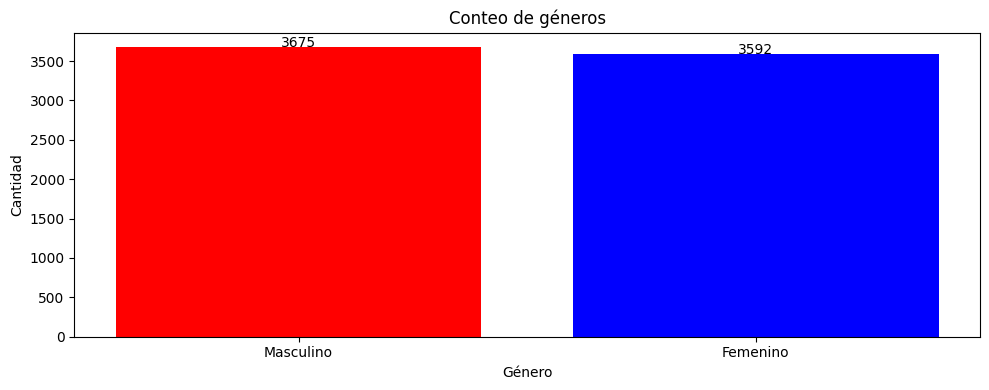

In [ ]:
# Se extrae el genero
customer = pd.json_normalize(df['customer'])
genero = customer['gender']

femenino = 0
masculino = 0

for n in genero:
    if n == 'Female':
        femenino += 1
    else:
        masculino += 1

# Gr√°fico
fig, axis = plt.subplots(figsize=(10, 4))
axis.bar(['Masculino', 'Femenino'], [masculino, femenino], color=['red', 'blue'])

axis.set_title('Conteo de g√©neros')
axis.set_ylabel('Cantidad')
axis.set_xlabel('G√©nero')

# A√±adir etiquetas de n√∫mero sobre cada barra
for i, valor in enumerate([masculino, femenino]):
    axis.text(i, valor + 1, str(valor), ha='center')

plt.tight_layout()
plt.show()


A√±os: 1519, Mes: 4005, Dos a√±os: 1743


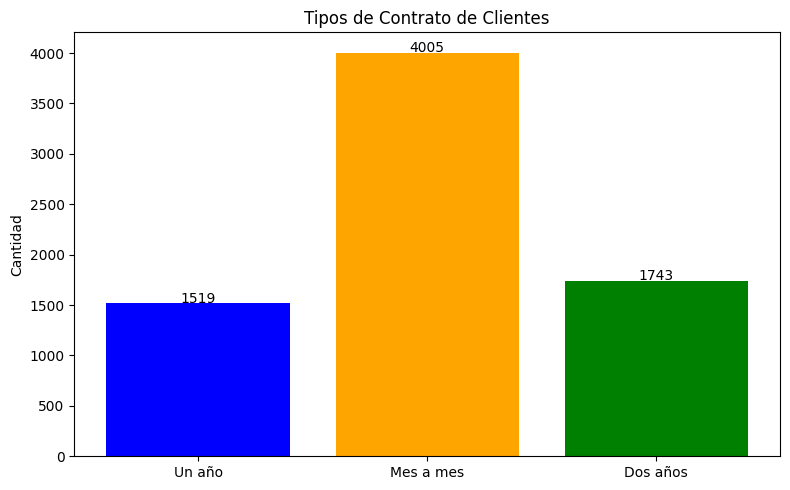

In [ ]:
from io import TextIOWrapper
# Se extrae el tipo de contrato
contratos = pd.json_normalize(df['account'])
tipo_contrato = contratos['Contract']
tipo_contrato.unique()

year = 0
month = 0
two_year = 0

for n in tipo_contrato:
  if n == 'One year':
    year += 1
  elif n == 'Month-to-month':
    month += 1
  else:
    two_year += 1


print(f"A√±os: {year}, Mes: {month}, Dos a√±os: {two_year}"  )

# Crear figura y eje
fig, axis = plt.subplots(figsize=(8, 5))

# Datos para el gr√°fico
etiquetas = ['Un a√±o', 'Mes a mes', 'Dos a√±os']
valores = [year, month, two_year]

# Gr√°fico de barras
axis.bar(etiquetas, valores, color=['blue', 'orange', 'green'])

# T√≠tulos y etiquetas
axis.set_title('Tipos de Contrato de Clientes')
axis.set_ylabel('Cantidad')

# A√±adir valores encima de las barras
for i, valor in enumerate(valores):
    axis.text(i, valor + 1, str(valor), ha='center')

plt.tight_layout()
plt.show()


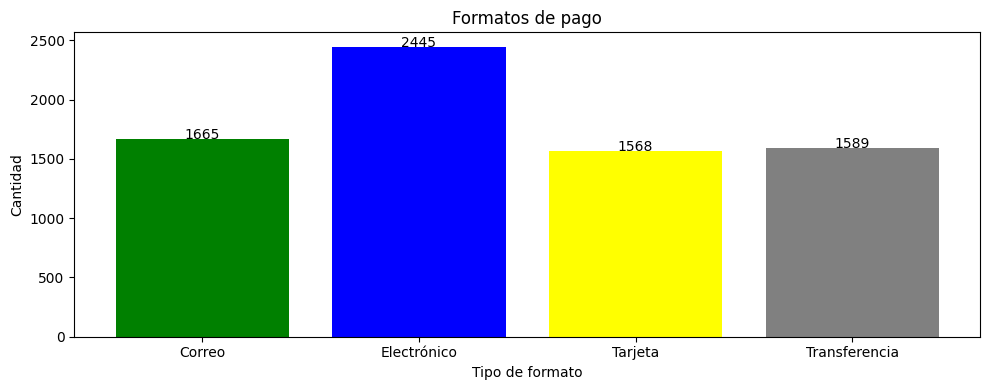

In [ ]:
# Se extrae la forma de pago
# Limpiar el texto eliminando la palabra " (automatic)" en cada fila
forma_pago = contratos['PaymentMethod'].str.replace(" \(automatic\)", "", regex=True)
forma_pago.unique()
correo = 0
electronico = 0
tarjeta = 0
transferencia = 0

# Mostrar los primeros 10 resultados
for n in forma_pago:
  if n == 'Mailed check':
    correo += 1
  elif n == 'Electronic check':
    electronico += 1
  elif n == 'Credit card':
    tarjeta += 1
  else:
    transferencia += 1


labels_pagos = ['Correo', 'Electr√≥nico', 'Tarjeta', 'Transferencia']
numeros_pagos = [correo, electronico, tarjeta, transferencia]
colores = ['green', 'blue', 'yellow', 'grey']

fig, axis = plt.subplots(figsize=(10, 4))
axis.bar(labels_pagos, numeros_pagos, color=colores)

axis.set_title('Formatos de pago')
axis.set_ylabel('Cantidad')
axis.set_xlabel('Tipo de formato')

# A√±adir valores arriba de las barras
for i, valor in enumerate(numeros_pagos):
    axis.text(i, valor + 1, str(valor), ha='center')

plt.tight_layout()
plt.show()


# üìä Informe Final del An√°lisis de Evasi√≥n de Clientes (Churn)

---

## üîπ Introducci√≥n

El objetivo de este an√°lisis es entender las causas detr√°s de la evasi√≥n de clientes (churn) en una empresa de telecomunicaciones.  
A trav√©s del uso de Python y sus principales librer√≠as para an√°lisis de datos, buscamos identificar patrones en el comportamiento de los usuarios que abandonan los servicios ofrecidos.

Este an√°lisis tiene como finalidad apoyar la toma de decisiones estrat√©gicas que mejoren la retenci√≥n de clientes y optimicen la experiencia del usuario.

---

## üîπ Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos para preparar los datos:

- üì• **Importaci√≥n** del archivo JSON original con los datos de clientes.
- üßπ **Limpieza de datos**:
  - Eliminaci√≥n de valores nulos o inconsistentes.
  - Conversi√≥n de datos categ√≥ricos y num√©ricos.
- üßæ **Transformaci√≥n** de columnas para facilitar el an√°lisis (por ejemplo: transformaci√≥n de variables booleanas, creaci√≥n de nuevas variables si es necesario).
- üìä **Estandarizaci√≥n** de los datos para su visualizaci√≥n (normalizaci√≥n, codificaci√≥n, etc.).

---

## üîπ An√°lisis Exploratorio de Datos (EDA)

Se realizaron diversos an√°lisis y visualizaciones para descubrir patrones ocultos en los datos. Entre los principales gr√°ficos se encuentran:

- ‚úÖ Distribuci√≥n de clientes por **g√©nero** y **tipo de contrato**.
- üí≥ Relaci√≥n entre **forma de pago** y evasi√≥n.
- üìà Comparaci√≥n entre clientes activos y clientes que han abandonado el servicio.
- üîç Detecci√≥n de variables que podr√≠an influir en la evasi√≥n, como:
  - Tenencia de servicios adicionales
  - Duraci√≥n del contrato
  - Facturaci√≥n mensual


---

## üîπ Conclusiones e Insights

A partir del an√°lisis realizado, se obtuvieron los siguientes hallazgos clave:

- üîπ Los clientes con **contratos mensuales** presentan una tasa de evasi√≥n significativamente m√°s alta que aquellos con contratos a largo plazo.
- üîπ Aquellos que pagan mediante **tarjetas de cr√©dito o transferencias autom√°ticas** tienden a permanecer m√°s tiempo como clientes.
- üîπ El **g√©nero** no parece ser un factor determinante en la evasi√≥n.
- üîπ El servicio de **seguridad en l√≠nea** parece estar vinculado a una mayor retenci√≥n.

---

## üîπ Recomendaciones

Basado en los hallazgos anteriores, se proponen las siguientes estrategias para reducir la evasi√≥n de clientes:

- üíº **Incentivar contratos a largo plazo**, ofreciendo beneficios adicionales por fidelidad.
- üßæ **Promover m√©todos de pago autom√°ticos** mediante descuentos u ofertas especiales.
- üì¢ **Campa√±as personalizadas** para clientes con mayor riesgo de abandono (contratos mensuales, servicios m√≠nimos, etc.).
- üß† **Mejorar servicios complementarios** como seguridad en l√≠nea, soporte t√©cnico y almacenamiento en la nube.
- üìä Implementar un sistema de seguimiento continuo para identificar tendencias tempranas de churn.

---

## üöÄ Cierre

Este an√°lisis demuestra c√≥mo el uso de Python, junto con t√©cnicas de ciencia de datos, puede aportar valor estrat√©gico en la toma de decisiones empresariales.  
La correcta interpretaci√≥n de los datos permite anticiparse al comportamiento del cliente y dise√±ar mejores experiencias que favorezcan la retenci√≥n y la satisfacci√≥n.

